In [1]:
import matplotlib.pyplot as plt
from mlflow_helper import add_tag
import mlflow
from mlflow.tracking import MlflowClient
client = MlflowClient()

%load_ext autoreload
%autoreload 2

In [2]:
experiment_id = client.get_experiment_by_name('law_school_gpa').experiment_id
runs = mlflow.search_runs(experiment_id)

In [3]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.loss,metrics.concensus_error,metrics.theta_dist,params.seed,...,params.lam,params.batch_size,params.N,params.eps,params.data,tags.mlflow.source.type,tags.mlflow.source.git.commit,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.user
0,17cb6a3f569349b7b03ee719c575f23d,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:59.915000+00:00,2023-05-23 23:12:32.093000+00:00,0.448246,2.886804e-10,0.161227,0,...,7.425007425007424e-05,1,10,"[1.009762700785465, 1.043037873274484, 1.02055...",5-partition,LOCAL,4f59087a411eed3e0bbc3a0abec32ac309d9c01a,selective-frog-558,run.py,zeyusun
1,13aec11ce52c48a18f72f4bdefc932de,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:59.842000+00:00,2023-05-23 23:50:29.661000+00:00,0.448245,1.907318e-09,0.157058,2,...,7.425007425007424e-05,1,10,"[1.009762700785465, 1.043037873274484, 1.02055...",5-partition,LOCAL,4f59087a411eed3e0bbc3a0abec32ac309d9c01a,overjoyed-shark-710,run.py,zeyusun
2,0f900a0528b548f685316ac9194d107b,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:59.830000+00:00,2023-05-23 23:12:12.630000+00:00,0.448245,5.697611e-10,0.154568,0,...,7.425007425007424e-05,1,10,"[1.009762700785465, 1.043037873274484, 1.02055...",5-partition,LOCAL,4f59087a411eed3e0bbc3a0abec32ac309d9c01a,enthused-trout-252,run.py,zeyusun
3,b5aadd3b2b884d27b79a6eeadf62a7a6,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:59.811000+00:00,2023-05-23 23:12:47.747000+00:00,0.448246,3.179200e-10,0.156275,1,...,7.425007425007424e-05,1,10,"[1.009762700785465, 1.043037873274484, 1.02055...",5-partition,LOCAL,4f59087a411eed3e0bbc3a0abec32ac309d9c01a,luminous-hen-517,run.py,zeyusun
4,a9abe5b6bec940eeb656427a1d604454,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:59.777000+00:00,2023-05-23 23:12:41.281000+00:00,0.448246,3.157036e-10,0.159887,2,...,7.425007425007424e-05,1,10,"[1.009762700785465, 1.043037873274484, 1.02055...",5-partition,LOCAL,4f59087a411eed3e0bbc3a0abec32ac309d9c01a,casual-vole-590,run.py,zeyusun
5,22b7ac5ada99475f95daeaa59f274f29,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:59.708000+00:00,2023-05-23 23:12:27.072000+00:00,0.448246,2.963217e-10,0.163970,3,...,7.425007425007424e-05,1,10,"[1.009762700785465, 1.043037873274484, 1.02055...",5-partition,LOCAL,4f59087a411eed3e0bbc3a0abec32ac309d9c01a,calm-croc-119,run.py,zeyusun
6,caf89da3636540f2a796eacb145517c8,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:59.690000+00:00,2023-05-23 23:50:07.601000+00:00,0.448246,7.587066e-10,0.162427,1,...,7.425007425007424e-05,1,10,"[1.009762700785465, 1.043037873274484, 1.02055...",5-partition,LOCAL,4f59087a411eed3e0bbc3a0abec32ac309d9c01a,nimble-pug-342,run.py,zeyusun
7,c286608fa1284908a2ef031b29ac58a2,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:59.558000+00:00,2023-05-23 23:12:38.064000+00:00,0.448247,1.557266e-10,0.160990,4,...,7.425007425007424e-05,1,10,"[1.009762700785465, 1.043037873274484, 1.02055...",5-partition,LOCAL,4f59087a411eed3e0bbc3a0abec32ac309d9c01a,peaceful-deer-643,run.py,zeyusun
8,ac670c1d09224a48b4778fab78af4a3d,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:59.445000+00:00,2023-05-23 23:12:19.937000+00:00,0.448247,5.129898e-10,0.157894,3,...,7.425007425007424e-05,1,10,"[1.009762700785465, 1.043037873274484, 1.02055...",5-partition,LOCAL,4f59087a411eed3e0bbc3a0abec32ac309d9c01a,marvelous-hare-380,run.py,zeyusun
9,bc135fb4498a46369415f686616c7f00,406211951082514100,FINISHED,file:///x/home/zeyusun/work/performative/credi...,2023-05-23 22:23:58.620000+00:00,2023-05-23 23:50:38.059000+00:00,0.448246,6.568812e-10,0.160114,0,

In [4]:
df2 = runs

In [6]:
indices = {
    'Full participation': (df2['params.K'] == '10'),
    'Scheme I': (df2['params.K'] == '5') & (df2['params.replace'] == 'True'),
    'Scheme II': (df2['params.K'] == '5') & (df2['params.replace'] == 'False'),
}

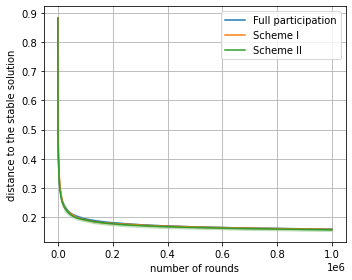

In [15]:
query, ylabel, filename = 'theta_dist', 'distance to the stable solution', 'law_school_dtheta.pdf'
plt.figure(figsize=(5, 4))
for i, (k, idx) in enumerate(indices.items()):
    values = [[e.value for e in client.get_metric_history(run_id, query)]
                for run_id in df2.loc[idx, 'run_id']]
    steps = [[e.step for e in client.get_metric_history(run_id, query)]
                for run_id in df2.loc[idx, 'run_id']]
    steps = steps[0]
    metric_mean = np.mean(values, axis=0)
    metric_std = np.std(values, axis=0)
    color = f'C{i}'
    plt.plot(steps, metric_mean, label=k, c=color)
    # plt.errorbar(steps, metric_mean, yerr=metric_std, alpha=0.2, ecolor=color)
    plt.fill_between(steps, metric_mean-metric_std, metric_mean+metric_std, alpha=0.2, color=color)

    # # baseline
    # idx1 = indices1[k]
    # values1 = [[e.value for e in client.get_metric_history(run_id, query)]
    #             for run_id in df1.loc[idx1, 'run_id']]
    # steps1 = [[e.step for e in client.get_metric_history(run_id, query)]
    #             for run_id in df1.loc[idx1, 'run_id']]
    # steps1 = steps1[0]
    # metric_mean1 = np.mean(values1, axis=0)
    # metric_std1 = np.std(values1, axis=0)
    # plt.plot(steps1, metric_mean1, label=k+' static', c=color, ls=':')
    # # plt.errorbar(steps1, metric_mean1, yerr=metric_std1, alpha=0.2, ecolor=color)
    # plt.fill_between(steps1, metric_mean1-metric_std1, metric_mean1+metric_std1, alpha=0.2, color=color)
plt.xlabel('number of rounds')
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(*ylim)
plt.ylabel(ylabel)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(filename)